#### Extraemos de la base de datos las variables indepencientes (X) y la dependiente (y)

In [3]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.cluster import KMeans


ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

# Pasamos a array la variable que queremos predecir ('actual')
y = np.array(ENS_2017_valida_2['Salud_percibida'])
# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
# axis 1 se refiere a las columnas
X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))
X.shape



(23089, 35)

In [30]:
# Dividimos en muestra de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## Método Kmeans

### Determinamos el número de Clusters óptimo en la muestra de entrenamiento

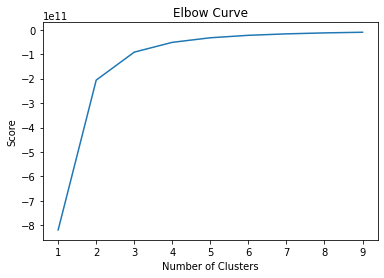

In [31]:
# Identificamos el número de clústers más adecuado viendo en una gráfica cual puede ser el elbow (codo). El número de clústers a partir del cual ya no aumenta de forma importante el score
import matplotlib.pyplot as plt

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# UTILIZAREMOS 4 CLÚSTERS

### Identificamos que número de clúster tiene mejor resultado: 3 o 4

In [34]:
for i in range (3,4):
    print ('n_cluster_train:', i)
    kmeans_train = KMeans(n_clusters=i, random_state=42).fit(X_train)
    print("kmeans.labels_:", kmeans_train.labels_)
    predict_train = kmeans_train.predict(X_train)
    print("\npredict:", predict_train)
    clusters_train = kmeans_train.cluster_centers_
    print(f'\nKMeans cluster centers 3:\n {clusters_train}')

    k_train_score = metrics.accuracy_score(y_train, predict_train)
    print(f'K_train_Score: {k_train_score.round(2)}')

    print ('n_cluster_test:', i)
    kmeans_test = KMeans(n_clusters=i, random_state=42).fit(X_test)
    print("kmeans.labels_:", kmeans_test.labels_)
    predict_test = kmeans_test.predict(X_test)
    print("\npredict:", predict_test)
    clusters_test = kmeans_test.cluster_centers_
    print(f'\nKMeans cluster centers 3:\n {clusters_test}')

    k_test_score = metrics.accuracy_score(y_test, predict_test)
    print(f'K_train_Score: {k_test_score.round(2)}')

    print ('...................................')
    print ('...................................')




n_cluster_train: 3
kmeans.labels_: [1 0 1 ... 2 2 0]

predict: [1 0 1 ... 2 2 0]

KMeans cluster centers 3:
 [[1.92048098e+04 7.72967282e+00 1.54324587e+00 5.34036281e+01
  2.47100745e+00 1.04842890e+00 1.94088111e+00 2.09199870e+00
  5.76336249e+00 1.77632005e+00 1.02607710e+00 1.02802073e+00
  1.78701004e+00 1.85017817e+00 7.28312277e+01 1.94671202e+00
  1.81778426e+00 3.06073858e+00 3.71914480e+00 3.61499838e+00
  3.01490120e+00 1.36977648e+00 2.14123745e+00 3.88111435e+00
  3.51522514e+00 1.36993845e+00 3.37755102e+00 4.98380305e+00
  4.41690962e+00 3.97635245e+00 3.06073858e+00 5.71509556e+00
  4.02121801e+00 3.99595076e+00 2.67622287e+00]
 [1.15036306e+04 1.08091615e+01 1.54159922e+00 5.33439624e+01
  2.38993202e+00 1.06846876e+00 1.92910327e+00 2.07397216e+00
  5.86581418e+00 1.75153771e+00 1.02606021e+00 1.02670767e+00
  1.81595986e+00 1.83376497e+00 7.22393979e+01 2.02784073e+00
  1.73794108e+00 2.86500486e+00 3.57559081e+00 3.62431208e+00
  3.01877630e+00 1.34558109e+00 1.991

## Datos estandarizados

### Vemos si mejoran los resultados para 3 y 4 clúster con los datos estandarizados

In [15]:
for i in range (3,4):
    X_train = StandardScaler().fit_transform(X_train)

    print ('n_cluster_train:', i)
    kmeans_train = KMeans(n_clusters=i, random_state=42).fit(X_train)
    print("kmeans.labels_:", kmeans_train.labels_)
    predict_train = kmeans_train.predict(X_train)
    print("\npredict:", predict_train)
    clusters_train = kmeans_train.cluster_centers_
    print(f'\nKMeans cluster centers 3:\n {clusters_train}')

    k_train_score = metrics.accuracy_score(y_train, predict_train)
    print(f'K_train_Score: {k_train_score.round(2)}')

    print ('...........................')
    X_test = StandardScaler().fit_transform(X_test)
    
    print ('n_cluster_test:', i)
    kmeans_test = KMeans(n_clusters=i, random_state=42).fit(X_test)
    print("kmeans.labels_:", kmeans_test.labels_)
    predict_test = kmeans_test.predict(X_test)
    print("\npredict:", predict_test)
    clusters_test = kmeans_test.cluster_centers_
    print(f'\nKMeans cluster centers 3:\n {clusters_test}')

    k_test_score = metrics.accuracy_score(y_test, predict_test)
    print(f'K_train_Score: {k_test_score.round(2)}')

    print ('...................................')
    print ('...................................')


n_cluster_train: 3
kmeans.labels_: [1 1 0 ... 1 1 2]

predict: [1 1 0 ... 1 1 2]

KMeans cluster centers 3:
 [[ 5.34031238e-02  9.72353790e-02  1.43876087e-01 -2.87581942e-01
  -4.61789374e-01 -8.24281923e-02 -2.03996242e-01 -2.83565057e-02
   8.66251707e-01  3.03554912e-01 -1.12679319e-01 -1.41230253e-01
  -4.72925426e-02 -2.81124917e-02 -2.32422278e-01  4.55006371e-01
  -2.95541745e-01  4.47230681e-02 -2.55558085e-02 -1.85975743e-01
   1.48533902e-01  1.20722364e-01 -3.51008221e-01  4.39960928e-02
   8.54886696e-02  8.03016020e-02  9.47218061e-02  5.56706405e-02
  -3.55848558e-01  5.00980504e-01  1.54360361e-02 -1.86607602e-01
   6.74248984e-02 -7.14172392e-01 -3.09933799e-01]
 [-3.47881312e-02 -7.51199584e-02 -3.71255492e-01 -7.55955527e-01
  -2.80462502e-01  2.92382643e-01  1.75490280e-01 -3.99196166e-01
  -5.39900236e-02  4.46829362e-01  2.95701726e-01  3.30158173e-01
   2.97710262e-01  2.85635625e-01  2.05812027e-01 -1.01338606e-01
   6.57552239e-01 -3.46418832e-01 -1.15067330e-0

## Aplicamos el modelo a todos los datos. Con 3 Clúster sin normalizar. Es el modelo en el que se obtienen un mejor Score

In [16]:
ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

y = np.array(ENS_2017_valida_2['Salud_percibida'])

X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))


### Kmeans. Base completa

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
print("kmeans.labels_:", kmeans.labels_)
predict = kmeans.predict(X)
print("\npredict:", predict)
clusters = kmeans.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters}')

kmeans.labels_: [2 2 2 ... 1 1 1]

predict: [2 2 2 ... 1 1 1]

KMeans cluster centers 3:
 [[1.15215000e+04 1.07767672e+01 1.54534823e+00 5.33778586e+01
  2.39851871e+00 1.06795738e+00 1.92918399e+00 2.07445426e+00
  5.87409044e+00 1.75272869e+00 1.02598753e+00 1.02702703e+00
  1.81704782e+00 1.83575884e+00 7.22544179e+01 2.03417360e+00
  1.72479210e+00 2.86772349e+00 3.57276507e+00 3.62240125e+00
  3.01858108e+00 1.34979210e+00 1.99051455e+00 3.76273389e+00
  3.63240644e+00 1.40059771e+00 3.16930873e+00 4.98999480e+00
  4.40059771e+00 4.02936590e+00 3.06496881e+00 5.53404366e+00
  3.93308212e+00 3.93620062e+00 2.67762474e+00]
 [1.92290000e+04 7.74297189e+00 1.54035497e+00 5.34503174e+01
  2.46949087e+00 1.04922917e+00 1.93444747e+00 2.08433735e+00
  5.75722244e+00 1.77458220e+00 1.02668739e+00 1.02681695e+00
  1.78637129e+00 1.85153517e+00 7.30513020e+01 1.94869802e+00
  1.81552015e+00 3.05583625e+00 3.70734551e+00 3.61264412e+00
  3.00816168e+00 1.37699184e+00 2.14211685e+00 3.8800362

In [18]:
k_score = metrics.accuracy_score(y, predict)
print(f'K_Score: {k_score.round(2)}')

K_Score: 0.3


## Vemos si mejora el modelo de 3 Clúster sin normalizar reduciendo las variables con PCA (análisis de componentes principales)
### Como el score en train y test es el mismo e igual que con todos los datos, aplicaremos el modelo PCA a todos los datos 

In [19]:
from sklearn.decomposition import PCA

for i in range (3,5):
    print ('PCA:', i)
    pca = PCA(n_components=i)
    pca.fit(X)
    X_pca = pca.transform(X)
    print('Varianza explicativa para PCA:', i)
    print(f'Varianza explicativa \n{pca.explained_variance_ratio_}')
    total_var_pca = pca.explained_variance_ratio_[0]
    print(f'\nTotal varianza explicativa: \n{total_var_pca.round(2)}')

    print('Kmeans para PCA:', i)
    kmeans_pca = KMeans(n_clusters=3, random_state=11).fit(X_pca)
    print("kmeans.labels_:", kmeans_pca.labels_)
    predict_pca = kmeans_pca.predict(X_pca)
    print("\npredict:", predict_pca)
    clusters_pca = kmeans_pca.cluster_centers_
    print(f'\nKMeans cluster centers con PCA: i {clusters_pca}')

    print('Score para PCA:', i)
    k_pca_score = metrics.accuracy_score(y, predict_pca)
    print(f'PCA_Score: {k_pca_score}')
    print(f'PCA_Score: {k_pca_score.round(2)}')

    print ('....................................')

PCA: 3
Varianza explicativa para PCA: 3
Varianza explicativa 
[9.99985603e-01 8.08773620e-06 4.83006978e-06]

Total varianza explicativa: 
1.0
Kmeans para PCA: 3
kmeans.labels_: [1 1 1 ... 0 0 0]

predict: [1 1 1 ... 0 0 0]

KMeans cluster centers con PCA: i [[-7.73399999e+03 -2.90036599e-02  2.10127481e-01]
 [ 7.65850003e+03 -7.35999506e-03  1.48824068e-01]
 [-7.55000387e+01  3.61536868e-02 -3.58373465e-01]]
Score para PCA: 3
PCA_Score: 0.3025250119104335
PCA_Score: 0.3
....................................
PCA: 4
Varianza explicativa para PCA: 4
Varianza explicativa 
[9.99985603e-01 8.08773620e-06 4.83006978e-06 5.77834314e-07]

Total varianza explicativa: 
1.0
Kmeans para PCA: 4
kmeans.labels_: [0 0 0 ... 1 1 1]

predict: [0 0 0 ... 1 1 1]

KMeans cluster centers con PCA: i [[ 7.72750003e+03  1.07715194e-01  8.69439271e-02 -7.04617895e-01]
 [-7.66499999e+03  6.53678054e-02  2.09395711e-01 -1.26059233e+00]
 [ 6.24999600e+01 -1.72750337e-01 -2.97353334e-01  1.96985303e+00]]
Score para 

## Mejora un poco con 4 componentes principales. Mantenemos el modelo de Kmeans con 3 Clústers y 4 componentes principales

## Método DBSCAN

In [38]:
ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

# Pasamos a array la variable que queremos predecir ('actual')
y = np.array(ENS_2017_valida_2['Salud_percibida'])
# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
# axis 1 se refiere a las columnas
X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))
X.shape

(23089, 35)

In [39]:
# Dividimos en muestra de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Identificamos con que número de epsilon y de min_samples obtenemos mejores resultados


In [41]:
# Importamos DBSCAN
from sklearn.cluster import DBSCAN

# Para DBSCAN 
# Normalizamos los datos
# X_train = StandardScaler().fit_transform(X_train)

for i in range (5,20):
    for j in range (2,10):
        print ('eps:', i)
        print ('min_sample:', j)
        db_train = DBSCAN(eps=i, min_samples=j).fit(X_train)
        core_samples_mask = np.zeros_like(db_train.labels_, dtype=bool)
        core_samples_mask[db_train.core_sample_indices_] = True
        y_db_train = db_train.labels_

        db_train_Score = metrics.accuracy_score(y_train, y_db_train)
        print('DB_train_Score:', db_train_Score.round(2))
        print('DB_train_Score:', db_train_Score)




eps: 5
min_sample: 2
DB_train_Score: 0.0
DB_train_Score: 0.00016241676140977748
eps: 5
min_sample: 3
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 5
min_sample: 4
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 5
min_sample: 5
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 5
min_sample: 6
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 5
min_sample: 7
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 5
min_sample: 8
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 5
min_sample: 9
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 6
min_sample: 2
DB_train_Score: 0.0
DB_train_Score: 0.00010827784093985166
eps: 6
min_sample: 3
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 6
min_sample: 4
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 6
min_sample: 5
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 6
min_sample: 6
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 6
min_sample: 7
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 6
min_sample: 8
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 6
min_sample: 9
DB_train_Score: 0.0
DB_tra

### Probamos con los datos estandarizados a ver si mejora el modelo con el número de epsilon y min_samples que mejores resultados hemos obtenido

In [42]:

# Normalizamos los datos
X_train = StandardScaler().fit_transform(X_train)

# Definimos DBSCAN 
db_train = DBSCAN(eps= 19, min_samples=3).fit(X_train)
core_samples_mask = np.zeros_like(db_train.labels_, dtype=bool)
core_samples_mask[db_train.core_sample_indices_] = True
y_db_train = db_train.labels_


In [43]:
db_train_Score = metrics.accuracy_score(y_train, y_db_train)
print('DB_train_Score:', db_train_Score.round(2))
print('DB_train_Score:', db_train_Score)

DB_train_Score: 0.0
DB_train_Score: 0.0


### Probamos una modificación en los datos para ver si mejoran los resultados
### Categorizamos las variables numéricas estableciendo las categorías en base a los valores de la mediana y los cuartiles

In [44]:
ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')
ENS_2017_valida_agr = ENS_2017_valida_2
ENS_2017_valida_agr.to_csv('../data/Bases_trabajo/ENS_2017_valida_agr.csv')

In [45]:
Mediana_Edad = ENS_2017_valida_agr['Edad'].median()
Cuartil25_Edad =ENS_2017_valida_agr['Edad'].quantile(0.25)
Cuartil75_Edad =ENS_2017_valida_agr['Edad'].quantile(0.75)
Mediana_Peso = ENS_2017_valida_agr['Peso(Kg)'].median()
Cuartil25_Peso = ENS_2017_valida_agr['Peso(Kg)'].quantile(0.25)
Cuartil75_Peso = ENS_2017_valida_agr['Peso(Kg)'].quantile(0.75)

print (f'Edad: {Mediana_Edad}, {Cuartil25_Edad}, {Cuartil75_Edad}')
print (f'Peso: {Mediana_Peso}, {Cuartil25_Peso}, {Cuartil75_Peso}')


Edad: 53.0, 39.0, 68.0
Peso: 71.0, 62.0, 80.0


In [46]:
# Edad
ENS_2017_valida_agr['Edad_ag'] = ENS_2017_valida_agr['Edad']

ENS_2017_valida_agr.loc[ENS_2017_valida_agr['Edad']<= 40,'Edad_ag'] = 1
ENS_2017_valida_agr.loc[(ENS_2017_valida_agr['Edad']>40) & (ENS_2017_valida_agr['Edad']<=53),'Edad_ag'] = 2
ENS_2017_valida_agr.loc[(ENS_2017_valida_agr['Edad']>53) & (ENS_2017_valida_agr['Edad']<=68),'Edad_ag'] = 3
ENS_2017_valida_agr.loc[ENS_2017_valida_agr['Edad']>68,'Edad_ag'] = 4

# Peso
ENS_2017_valida_agr['Peso_ag'] = ENS_2017_valida_agr['Peso(Kg)']

ENS_2017_valida_agr.loc[ENS_2017_valida_agr['Peso(Kg)']<= 62,'Peso_ag'] = 1
ENS_2017_valida_agr.loc[(ENS_2017_valida_agr['Peso(Kg)']>62) & (ENS_2017_valida_agr['Peso(Kg)']<=71),'Peso_ag'] = 2
ENS_2017_valida_agr.loc[(ENS_2017_valida_agr['Peso(Kg)']>71) & (ENS_2017_valida_agr['Peso(Kg)']<=82),'Peso_ag'] = 3
ENS_2017_valida_agr.loc[ENS_2017_valida_agr['Peso(Kg)']>82,'Peso_ag'] = 4


#### Eliminamos las variables numéricas de Edad y Peso y mantenemos estas variables categorizadas

In [47]:
del ENS_2017_valida_agr["Edad"]
del ENS_2017_valida_agr["Peso(Kg)"]
del ENS_2017_valida_agr["Unnamed: 0"]
ENS_2017_valida_agr.to_csv('../data/Bases_trabajo/ENS_2017_valida_agr.csv')


In [48]:
ENS_2017_valida_agr = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_agr.csv", sep =',')

# Pasamos a array la variable que queremos predecir ('actual')
y = np.array(ENS_2017_valida_agr['Salud_percibida'])
# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
# axis 1 se refiere a las columnas
X= np.array(ENS_2017_valida_agr.drop('Salud_percibida', axis = 1))
X.shape

(23089, 35)

In [49]:
# Dividimos en muestra de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

#### Identificamos el valor de epsilon y de min_sample con el que obtenemos mejores resultados 

In [50]:
# Importamos DBSCAN
from sklearn.cluster import DBSCAN

# Para DBSCAN 

for i in range (1,20):
    for j in range (2,10):
        print ('eps:', i)
        print ('min_sample:', j)
        db_train = DBSCAN(eps=i, min_samples=j).fit(X_train)
        core_samples_mask = np.zeros_like(db_train.labels_, dtype=bool)
        core_samples_mask[db_train.core_sample_indices_] = True
        y_db_train = db_train.labels_

        db_train_Score = metrics.accuracy_score(y_train, y_db_train)
        print('DB_train_Score:', db_train_Score.round(2))
        print('DB_train_Score:', db_train_Score)



eps: 1
min_sample: 2
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 3
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 4
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 5
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 6
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 7
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 8
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 9
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 2
min_sample: 2
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 2
min_sample: 3
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 2
min_sample: 4
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 2
min_sample: 5
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 2
min_sample: 6
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 2
min_sample: 7
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 2
min_sample: 8
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 2
min_sample: 9
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 3
min_sample: 2
DB_

## Datos estandarizados

### Probamos con los datos estandarizados a ver si mejora el modelo con el número de epsilon que mejores resultados hemos obtenido

In [52]:
from sklearn.preprocessing import StandardScaler

# Normalizamos los datos
X_train = StandardScaler().fit_transform(X_train)

for i in range (1,20):
    for j in range (2,10):
        print ('eps:', i)
        print ('min_sample:', j)
        db_train = DBSCAN(eps=i, min_samples=j).fit(X_train)
        core_samples_mask = np.zeros_like(db_train.labels_, dtype=bool)
        core_samples_mask[db_train.core_sample_indices_] = True
        y_db_train = db_train.labels_

        db_train_Score = metrics.accuracy_score(y_train, y_db_train)
        print('DB_train_Score:', db_train_Score.round(2))
        print('DB_train_Score:', db_train_Score)


eps: 1
min_sample: 2
DB_train_Score: 0.0
DB_train_Score: 5.413892046992583e-05
eps: 1
min_sample: 3
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 4
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 5
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 6
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 7
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 8
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 1
min_sample: 9
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 2
min_sample: 2
DB_train_Score: 0.0
DB_train_Score: 5.413892046992583e-05
eps: 2
min_sample: 3
DB_train_Score: 0.0
DB_train_Score: 0.0002165556818797033
eps: 2
min_sample: 4
DB_train_Score: 0.0
DB_train_Score: 0.00032483352281955497
eps: 2
min_sample: 5
DB_train_Score: 0.0
DB_train_Score: 0.00027069460234962914
eps: 2
min_sample: 6
DB_train_Score: 0.0
DB_train_Score: 0.00032483352281955497
eps: 2
min_sample: 7
DB_train_Score: 0.0
DB_train_Score: 0.0
eps: 2
min_sample: 8
DB_train_Score

## Conclusión
## El mejor modelo para agrupar los registros en Clúster es el de Kmeans con 3 Cluster y las variables agrupadas en 4 componentes principales

### .................................................................................

## Añadimos una columna a nuestro Dataframe con la asignación de los Clústers a cada una de las filas

In [53]:
ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

# Pasamos a array la variable que queremos predecir ('actual')
y = np.array(ENS_2017_valida_2['Salud_percibida'])
# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
# axis 1 se refiere a las columnas
X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))
X.shape



(23089, 35)

In [54]:
pca = PCA(n_components=4)
pca.fit(X)
X_pca = pca.transform(X)
print('Varianza explicativa para PCA:', 4)
print(f'Varianza explicativa \n{pca.explained_variance_ratio_}')
total_var_pca = pca.explained_variance_ratio_[0]
print(f'\nTotal varianza explicativa: \n{total_var_pca.round(2)}')

print('Kmeans para PCA:', 4)
kmeans_pca = KMeans(n_clusters=3, random_state=11).fit(X_pca)
print("kmeans.labels_:", kmeans_pca.labels_)
predict_pca = kmeans_pca.predict(X_pca)
print("\npredict:", predict_pca)
clusters_pca = kmeans_pca.cluster_centers_
print(f'\nKMeans cluster centers con PCA: i {clusters_pca}')

print('Score para PCA:', 4)
k_pca_score = metrics.accuracy_score(y, predict_pca)
print(f'PCA_Score: {k_pca_score}')
print(f'PCA_Score: {k_pca_score.round(2)}')


Varianza explicativa para PCA: 4
Varianza explicativa 
[9.99985603e-01 8.08773620e-06 4.83006978e-06 5.77834314e-07]

Total varianza explicativa: 
1.0
Kmeans para PCA: 4
kmeans.labels_: [0 0 0 ... 1 1 1]

predict: [0 0 0 ... 1 1 1]

KMeans cluster centers con PCA: i [[ 7.72750003e+03  1.07715194e-01  8.69439271e-02 -7.04617900e-01]
 [-7.66499999e+03  6.53678054e-02  2.09395711e-01 -1.26059232e+00]
 [ 6.24999600e+01 -1.72750337e-01 -2.97353334e-01  1.96985302e+00]]
Score para PCA: 4
PCA_Score: 0.30473385594872016
PCA_Score: 0.3


In [56]:
Clusters = kmeans_pca.predict(X_pca)
ENS_2017_valida_2['Clusters'] = Clusters



In [57]:
ENS_2017_C = ENS_2017_valida_2
ENS_2017_C.to_csv('../data/Bases_trabajo/ENS_2017_C.csv')


## Obtenemos el porcentaje y el número de observaciones en cada Clúster

In [5]:
ENS_2017_C= pd.read_csv("../data/Bases_trabajo/ENS_2017_C.csv", sep =',')

In [6]:
freq_Clusters = ENS_2017_C['Clusters'].value_counts() / len(ENS_2017_C['Clusters'])*100
freq_Clusters

1    33.535450
2    33.331890
0    33.132661
Name: Clusters, dtype: float64

In [7]:
freq_Clusters_abs = ENS_2017_C['Clusters'].value_counts() 
freq_Clusters_abs

1    7743
2    7696
0    7650
Name: Clusters, dtype: int64

## Identificamos el perfil de cada Clúster cruzando las diferentes variables del dataset con la columna de Clúster

In [8]:
Cluster_SaludPercibida = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Salud_percibida']).apply(lambda r: r/r.sum() *100,axis=0)

print (Cluster_SaludPercibida)

Salud_percibida          1          2          3
Clusters                                        
0                32.905119  33.248960  34.412955
1                33.811542  33.285120  32.253711
2                33.283339  33.465919  33.333333


In [9]:
variables = ['CCAA', 'Sexo', 
       'Actividad_economica_actual', 'Nacionalidad_española', 'Convivencia',
       'Estado_civil', 'Nivel_estudios', 'Vacunación_gripe',
       'Toma_tensiónArterial_profesional', 'Medición_colesterol',
       'Prueba_sangreHeces', 'Colonoscopia', 
       'Freq_ActividadFísica', 'Freq_Consumo_FrutaFresca',
       'Freq_Consumo_Carne', 'Freq_Consumo_Huevos', 'Freq_Consumo_Pescado',
       'Freq_Consumo_PastaArrozPatatas', 'Freq_Consumo_PanCereales',
       'Freq_Consumo_VerdurasEnsaladasHortalizas', 'Freq_Consumo_Legumbres',
       'Freq_Consumo_EmbutidosFiambres', 'Freq_Consumo_Lácteos',
       'Freq_Consumo_Dulces', 'Freq_Consumo_ComidaRápida',
       'Freq_Consumo_ZumoNatural', 'Freq_Diaria_CepilladoDientes',
       '¿Fuma actualmente', 'Freq_Consumo_Alcohol',
       'ApoyoAfectivoPersonal_AmigosFamiliares', 'ClaseSocial_BasadaOcupación',
       'Índice_MasaCorporal']
       
for i in variables:
    Cluster_i = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C[i]).apply(lambda r: r/r.sum() *100,axis=0)
    print(Cluster_i)

CCAA             1          2          3      4      5      6          7   \
Clusters                                                                    
0         36.729131   0.000000   0.000000  100.0    0.0    0.0  20.823621   
1         23.236797  85.933014  34.326579    0.0  100.0  100.0  62.781663   
2         40.034072  14.066986  65.673421    0.0    0.0    0.0  16.394716   

CCAA             8          9          10     11         12     13     14  \
Clusters                                                                    
0         56.344277  84.976725  53.194975  100.0  44.269663    0.0    0.0   
1         31.233363   9.691071  46.805025    0.0  32.434457    0.0    0.0   
2         12.422360   5.332205   0.000000    0.0  23.295880  100.0  100.0   

CCAA         15         16     17     18     19  
Clusters                                         
0           0.0  14.792503    0.0    0.0    0.0  
1           0.0  49.732262    0.0  100.0  100.0  
2         100.0  35.475234  

In [11]:
variables = ['Edad', 'Peso(Kg)']

for i in variables:
    Cluster_i = ENS_2017_C.groupby(['Clusters'])[i].describe()

    print(Cluster_i)

           count       mean        std   min   25%   50%   75%    max
Clusters                                                             
0         7650.0  53.527190  18.978808  15.0  39.0  53.0  68.0  103.0
1         7743.0  53.476947  18.922976  15.0  40.0  53.0  68.0  100.0
2         7696.0  53.304704  18.784073  15.0  39.0  53.0  68.0  102.0
           count       mean        std   min   25%   50%   75%    max
Clusters                                                             
0         7650.0  72.348366  14.543179  25.0  62.0  71.0  80.0  150.0
1         7743.0  73.048302  14.900063  26.0  62.0  71.0  82.0  180.0
2         7696.0  72.264683  14.475001  36.0  62.0  71.0  80.0  155.0
